In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
print(y, "\n\n")
k_indices = build_k_indices(y, 4, 6)
print(k_indices)
print(k_indices[0], "\n\n")
train_indices = np.delete(k_indices, 2, 1)
print(train_indices)

[ 8.95549970e-02 -1.28027608e+00  1.28930361e+00 -2.68157012e-01
 -2.06807030e-01  5.38669461e-01 -4.84226326e-01 -1.05814170e+00
  2.22695473e-01  1.94693837e-01  4.37144573e-01 -3.01041920e-01
  4.25144932e-01  3.76102400e-02  8.33364051e-01 -4.37345163e-01
 -1.41108000e-04 -3.08575746e-01  7.22554859e-01 -3.72595292e-01
 -7.37222919e-01  9.51211821e-01  6.05998553e-01  3.59152612e-01
  7.77071848e-01  3.88647453e-01 -5.59911457e-01 -5.68519390e-01
 -1.29168955e+00  9.94909022e-01  7.00138842e-01  7.27781486e-01
  7.73288841e-01 -7.46011639e-01 -1.33397556e+00 -1.50508406e-01
  2.52524512e-01 -9.56348655e-01 -1.30763072e+00 -8.26518932e-01
  6.67509379e-01 -5.72305352e-01  7.69121860e-02  7.39727694e-01
 -1.06662741e+00  3.05224230e-02 -7.66467434e-01 -8.35127298e-01
  1.21879684e-01 -1.04670162e+00] 


[[49 40 38 23  7  0  6 34 14 31 48 24]
 [19  3 41 28 43 30 47 17 21 29 39 18]
 [22 44 37  5 32 27 46 12  2  8 36  4]
 [33 26 13 11  1 25 16 45 15 42 20 35]]
[49 40 38 23  7  0  6 34 1

In [6]:
from build_polynomial import build_poly
#print(x)
k_indices = build_k_indices(x, 4, 6)
#print(k_indices)
#print(k_indices[0,4])
#print(x[k_indices[0,4]])
phi_te = build_poly(x[k_indices[0]], 2)
print(phi_te)

[[1.00000000e+00 5.14749821e+00 2.64967378e+01]
 [1.00000000e+00 2.62374910e+00 6.88405937e+00]
 [1.00000000e+00 5.02131076e+00 2.52135617e+01]
 [1.00000000e+00 1.00000000e-01 1.00000000e-02]
 [1.00000000e+00 5.65224803e+00 3.19479078e+01]
 [1.00000000e+00 3.52374910e-01 1.24168077e-01]
 [1.00000000e+00 3.88562366e+00 1.50980712e+01]
 [1.00000000e+00 4.39037348e+00 1.92753793e+01]
 [1.00000000e+00 1.61424946e+00 2.60580133e+00]
 [1.00000000e+00 1.99281183e+00 3.97129899e+00]
 [1.00000000e+00 2.74993656e+00 7.56215108e+00]
 [1.00000000e+00 2.11899928e+00 4.49015797e+00]]


In [7]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    indices_te = k_indices[k]
    indices_tr = np.delete(k_indices, k, 1).ravel()
    
    #print(indices_te, "\n\n", indices_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    phi_te = build_poly(x[indices_te], degree)
    phi_tr = build_poly(x[indices_tr], degree)
    y_te = y[indices_te]
    y_tr = y[indices_tr]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    weights = ridge_regression(y_tr, phi_tr, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = np.sqrt(2*compute_mse(y_tr, phi_tr, weights))
    loss_te = np.sqrt(2*compute_mse(y_te, phi_te, weights))
    return loss_tr, loss_te

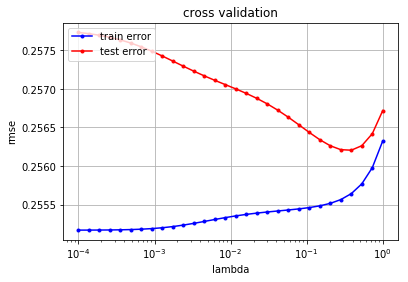

In [8]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        rmse_train = []
        rmse_test = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_train.append(loss_tr)
            rmse_test.append(loss_te)
        rmse_tr.append(np.mean(rmse_train))
        rmse_te.append(np.mean(rmse_test))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [11]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.05
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        weights = least_squares(y_tr.T, x_tr)
        #rmse_tr = np.sqrt(2*compute_mse(y_tr, x_tr, w))
        #rmse_te = np.sqrt(2*compute_mse(y_te, x_te, w))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional